<a href="https://colab.research.google.com/github/theaok/linaColMex/blob/main/linaColMex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#---------------------------SETUP----------------------------------
#get useful libraries
import io, time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import urllib.request
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

## quick comparison to wvs

In [9]:
wvs0 = pd.read_stata('http://theaok.github.io/junk/wvs.tar.bz2', convert_categoricals=False)

In [11]:
wvs.columns

Index(['S002VS', 'c', 'cc', 'S004', 'S006', 'S007', 'S010', 'S013', 'S013B',
       'S016',
       ...
       'cat', 'pro', 's_c', 'fair', 'famUns', 'hap', 'monSafHumIde', 'aut_ind',
       'myself', 'dec_mys'],
      dtype='object', length=189)

In [12]:
wvs = wvs0[wvs0['cc'].isin(['MEX', 'COL'])]
wvs.shape

(23796, 189)

In [27]:
#just to test CI
# Take a 5% random sample of the wvs DataFrame
wvs_sample = wvs.sample(frac=0.005, random_state=42)
wvs_sample.shape



(119, 189)

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-2205655088.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=wvs, x='cc', y='ls', errorbar=('ci', 95),errwidth=1,err_kws={"color": "red"})


<Axes: xlabel='cc', ylabel='ls'>

Text(0.5, 1.0, 'Mean of variable "ls" by "cc" with 95% CI')

Text(0.5, 0, 'Country Code')

Text(0, 0.5, 'Mean of ls')

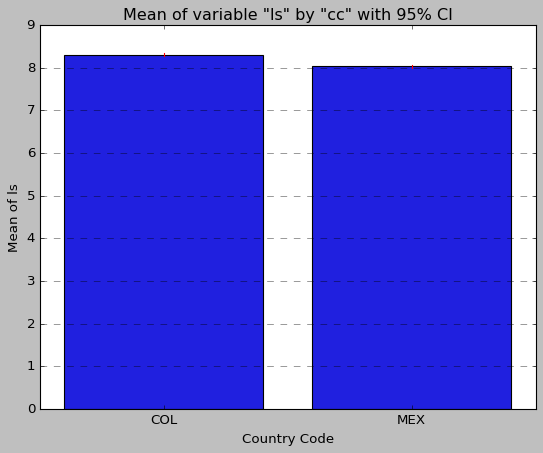

In [31]:
# Create the bar plot with 95% confidence intervals
plt.figure(figsize=(8, 6))
sns.barplot(data=wvs, x='cc', y='ls', errorbar=('ci', 95),errwidth=1,err_kws={"color": "red"})
plt.title('Mean of variable "ls" by "cc" with 95% CI')
plt.xlabel('Country Code')
plt.ylabel('Mean of ls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 800x560 with 0 Axes>

<Axes: xlabel='cc', ylabel='value'>

Text(0.5, 1.0, 'Mean of "ls" and "satFin" by "cc" with 95% CI')

Text(0.5, 0, 'Country Code')

Text(0, 0.5, 'Mean Value')

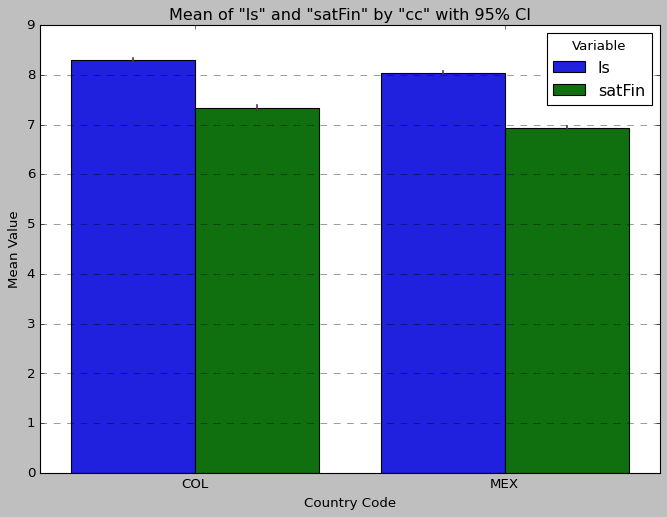

In [35]:
#do a bar graph with 95% CI of variables ls,hap,satFin,sts_dem,sts_gov by cc variable
#in one graph, without separate subplots where bars are next to each other

# Melt the DataFrame to long format for easier plotting of multiple variables
wvs_melted = pd.melt(wvs, id_vars=['cc'], value_vars=['ls', 'satFin'],
                     var_name='variable', value_name='value')

# Create a single bar plot with 95% confidence intervals, with bars next to each other
plt.figure(figsize=(10, 7))
sns.barplot(data=wvs_melted, x='cc', y='value', hue='variable', errorbar=('ci', 95))

plt.title('Mean of "ls" and "satFin" by "cc" with 95% CI')
plt.xlabel('Country Code')
plt.ylabel('Mean Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Variable')
plt.show()

both life satisfaction and financial satisfaction are sligtly higher in COL

<Figure size 800x560 with 0 Axes>

<Axes: xlabel='cc', ylabel='value'>

Text(0.5, 1.0, 'Mean of "ls" and "satFin" by "cc" with 95% CI')

Text(0.5, 0, 'Country Code')

Text(0, 0.5, 'Mean Value')

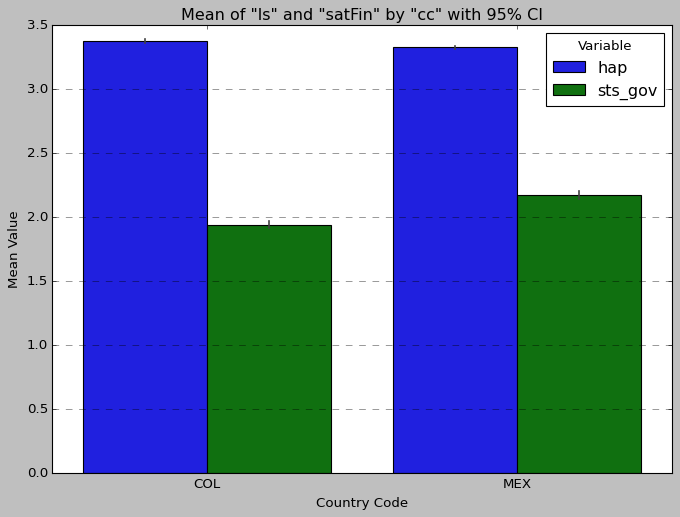

In [38]:
# Melt the DataFrame to long format for easier plotting of multiple variables
wvs_melted = pd.melt(wvs, id_vars=['cc'], value_vars=['hap', 'sts_gov'],
                     var_name='variable', value_name='value')

# Create a single bar plot with 95% confidence intervals, with bars next to each other
plt.figure(figsize=(10, 7))
sns.barplot(data=wvs_melted, x='cc', y='value', hue='variable', errorbar=('ci', 95))

plt.title('Mean of "ls" and "satFin" by "cc" with 95% CI')
plt.xlabel('Country Code')
plt.ylabel('Mean Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Variable')
plt.show()

happiness slightly higher in COL; satisfaction with govt higher in MEX

#enbiare y ecv

## col


In [90]:
#https://microdatos.dane.gov.co/index.php/catalog/734
zip_url = 'https://github.com/theaok/linaColMex/raw/refs/heads/main/Caracteristicas%20y%20composicion%20del%20hogar.zip'
with urllib.request.urlopen(zip_url) as response: zip_content = response.read() # Fetch content
# Open the ZIP file
with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zf:
    # List files in the archive to ensure we have the correct name
    # print(zf.namelist())
    # Read the specific file from the ZIP archive
    with zf.open('Caracteristicas y composicion del hogar.dta') as dta_file:
        chaComHog = pd.read_stata(dta_file)
        #with pd.io.stata.StataReader(dta_file) as reader:
        #  variable_labels = reader.variable_labels()
        #  print("Variable Labels:")
        #  print(variable_labels)
chaComHog.columns

Index(['directorio', 'secuencia_encuesta', 'secuencia_p', 'orden', 'fex_c',
       'p6016', 'p1894', 'p6020', 'p6034', 'p6040', 'p6051', 'p5502', 'p6071',
       'p6071s1', 'p756', 'p756s1', 'p756s2', 'p756s3', 'p6074', 'p755',
       'p755s1', 'p755s2', 'p755s3', 'p754', 'p753', 'p753s1', 'p753s2',
       'p753s3', 'p752', 'p1662', 'p6081', 'p6081s1', 'p6087', 'p6083',
       'p6083s1', 'p6088', 'p6080', 'p5667', 'p2057', 'p2059', 'p2061',
       'p1895', 'p1896', 'p1897', 'p1898', 'p1899', 'p3175', 'p1901', 'p1903',
       'p1904', 'p1905', 'p1927'],
      dtype='object')

In [108]:
chaComHog['p6080'].value_counts()

,count
p6080,
6,206230
1,28425
5,21831
3,983
4,77
2,43


later:

p756s2 is city!

¿Siempre ha vivido aquí en este municipio? (P6074) yes no

¿Dónde vivía ..., hace 5 años? (P755) this town, other

De acuerdo con su cultura, pueblo o rasgos físicos, : (P6080) indigenous people

In [80]:
#https://microdatos.dane.gov.co/index.php/catalog/734/data-dictionary/F3?file_name=Caracteristicas%20y%20composicion%20del%20hogar
chaComHog.rename(columns={
    'p6020': 'gender',
    'p6051': 'hhHead',
    'p756' : 'bornWhere',
    'p756s1': 'department'
    }, inplace=True)
chaComHog.columns

Index(['directorio', 'secuencia_encuesta', 'secuencia_p', 'orden', 'fex_c',
       'p6016', 'p1894', 'gender', 'birthdate', 'p6040', 'p6051', 'p5502',
       'p6071', 'p6071s1', 'p756', 'p756s1', 'p756s2', 'p756s3', 'p6074',
       'p755', 'p755s1', 'p755s2', 'p755s3', 'p754', 'p753', 'p753s1',
       'p753s2', 'p753s3', 'p752', 'p1662', 'p6081', 'p6081s1', 'p6087',
       'p6083', 'p6083s1', 'p6088', 'p6080', 'p5667', 'p2057', 'p2059',
       'p2061', 'p1895', 'p1896', 'p1897', 'p1898', 'p1899', 'p3175', 'p1901',
       'p1903', 'p1904', 'p1905', 'p1927'],
      dtype='object')

In [98]:
#labels hack with dict
lab = {
  "hhHead": '''Cuál es el parentesco de....con el jefe o la jefa de este hogar?
1 Jefe (a) del hogar
2 Pareja, esposo (a), cónyuge, compañero(a)
3 Hijo(a) hijastro(a)
4 Nieto (a)
5 Padre, madre, padrastro y madrastra
6 Suegro o suegra
7 Hermano (a), hermanastro (a)
8 Yerno, nuera
9 Otro pariente del jefe(a)
10 Empleado(a) del servicio doméstico
11 Parientes del servicio doméstico
12 Trabajador
13 Pensionista
14 Otro pariente''',
  "bornWhere": '''¿Dónde nació ________?
1- En este municipio
2- En otro municipio
3- En otro país''',
  "department": '''Departamento de nacimiento; Registre el lugar de nacimiento de la persona encuestada.
  Si la persona indica que nació en otro municipio (o país) por razones médicas u otra razón externa,
  considere como lugar de nacimiento de la persona el lugar de residencia de la madre al momento del nacimiento.'''
}
print(lab["department"])

Departamento de nacimiento; Registre el lugar de nacimiento de la persona encuestada. 
  Si la persona indica que nació en otro municipio (o país) por razones médicas u otra razón externa, 
  considere como lugar de nacimiento de la persona el lugar de residencia de la madre al momento del nacimiento.


In [100]:
#assign names to numeric codes of departments in colombia based on variable department
department_mapping = {
    5: 'Antioquia',
    11: 'Bogotá, D.C.',
    76: 'Valle del Cauca',
    15: 'Boyacá',
    73: 'Tolima',
    25: 'Cundinamarca',
    68: 'Santander',
    50: 'Meta',
    17: 'Caldas',
    41: 'Huila',
    52: 'Nariño',
    18: 'Caquetá',
    54: 'Norte de Santander',
    19: 'Cauca',
    13: 'Bolívar',
    8: 'Atlántico',
    23: 'Córdoba',
    63: 'Quindío',
    47: 'Magdalena',
    85: 'Casanare',
    66: 'Risaralda',
    70: 'Sucre',
    20: 'Cesar',
    86: 'Putumayo',
    81: 'Arauca',
    27: 'Chocó',
    44: 'La Guajira',
    95: 'Guaviare',
    99: 'Vichada',
    91: 'Amazonas',
    94: 'Guainía',
    97: 'Vaupés',
    88: 'San Andrés y Providencia',
    # Add other mappings here as per official data
}

Department mapping dictionary created. Please ensure all official codes and names are correctly included.


In [101]:
chaComHog['department_name'] = chaComHog['department'].map(department_mapping)
chaComHog['department_name'].value_counts(dropna=False)

KeyError: 'department'

In [54]:
chaComHog[['gender', 'p6034']].head()

,gender,p6034
0,2,1
1,2,1
2,2,1
3,1,1
4,2,1
